# Data Quality Check

This notebook will investigate the quality of the statcast data, such as missing values 

In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from IPython.display import Video


RAW_DATA = pathlib.Path.cwd().parent / 'Data' / 'raw' / 'Statcast_data.csv'
print(pathlib.Path.is_file(RAW_DATA))


True


In [2]:
#read in the data as a dataframe
baseball = pd.read_csv(RAW_DATA, index_col = 0)


# Look at data in general

In [3]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127400 entries, 0 to 127399
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   player_name        127400 non-null  object 
 1   p_throws           127400 non-null  object 
 2   pitch_name         126918 non-null  object 
 3   release_speed      126922 non-null  float64
 4   release_spin_rate  125123 non-null  float64
 5   release_pos_x      126899 non-null  float64
 6   release_pos_y      126899 non-null  float64
 7   release_pos_z      126899 non-null  float64
 8   pfx_x              126899 non-null  float64
 9   pfx_z              126899 non-null  float64
 10  vx0                126899 non-null  float64
 11  vy0                126899 non-null  float64
 12  vz0                126899 non-null  float64
 13  ax                 126899 non-null  float64
 14  ay                 126899 non-null  float64
 15  az                 126899 non-null  float64
 16  sz

# Look at cateorical (object) data types

In [4]:
cat_dtypes = [col for col in baseball.select_dtypes('object').columns]
cat_dtypes

['player_name', 'p_throws', 'pitch_name', 'description']

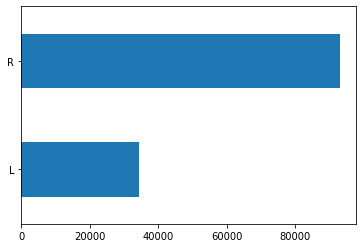

In [5]:
# p_throws
baseball['p_throws'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [6]:
# check out the pitch_name categories
baseball['pitch_name'].value_counts()

4-Seam Fastball    44441
Slider             20911
2-Seam Fastball    13845
Sinker             12296
Changeup           11395
Curveball          11095
Cutter              7684
Knuckle Curve       3112
Split Finger        2127
Eephus                12
Name: pitch_name, dtype: int64

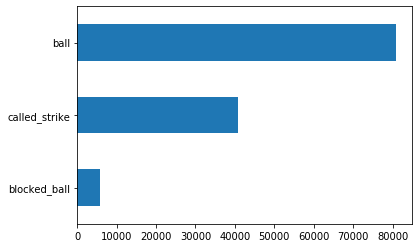

In [7]:
#target feature
baseball['description'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Takeaways: 
1. Eephus is not a common pitch; it is extremely rare, and virtually no pitcher intentionlly has an Eephus pitch that would intend to use in a game.
2. Knuckle Curve is considered to be essentially the same type of pitch as Curveball; they move very similarly to be considered the same pitch.
3. The 'description' column has ball and blocked_ball categories, which are the same result: ball. Those features can be combined. Also note the imbalance between the categories.  

# Numeric Data

1. Check extreme/impossible values (ex: negative velocity)
2. Check missing values
3. 

In [8]:
baseball.describe().T

,count,mean,std,min,25%,50%,75%,max
release_speed,126922.0,88.655518,5.995486,56.0000,84.400000,90.1000,93.30000,104.4000
release_spin_rate,125123.0,2242.981818,310.892679,485.0000,2093.000000,2258.0000,2423.00000,3640.0000
release_pos_x,126899.0,-0.812049,1.980724,-5.0047,-2.208100,-1.5721,0.93730,4.8683
release_pos_y,126899.0,54.511098,0.506376,51.0297,54.177400,54.5045,54.83980,57.7872
release_pos_z,126899.0,5.848970,0.554406,1.7088,5.594750,5.9087,6.19450,7.2505
pfx_x,126899.0,-0.146567,0.886198,-2.4215,-0.917550,-0.2365,0.57100,2.2929
pfx_z,126899.0,0.638116,0.752024,-2.0134,0.202200,0.8001,1.23930,2.6710
vx0,126899.0,2.480640,6.250609,-20.0954,-1.777000,4.1167,7.04300,18.9980
vy0,126899.0,-128.837880,8.699982,-152.0191,-135.530150,-130.8923,-122.75240,-80.9000
vz0,126899.0,-4.254487,3.452198,-17.2848,-6.712850,-4.4476,-2.01230,11.6642


Some notes:
- release_speed: no improper values. Some pitches are slow (59mph), and some pitches are very fast (104mph); both values not unheard of.
- release_spin_rate: minimum and max values are interesting; may be an eephus pitch / extreme fastball, respectively. Will explore below.
- release_pos_x: Range is supposed to be (-5, 5), so while the min value is less than -5, it is not too troubling.
- release_pos_y: no improper values. Interesting range of values. Curious to explore further.
- release_pos_z: no improper values.
- pfx_x: no improper values
- pfx_z: no improper values
- vx0: no improper values
- vy0: no improper values
- vz0: no improper values
- ax: no improper values
- ay: no improper values
- az: no improper values
- sz_top: no improper values
- sz_bot: no improper values
- release_extension: no improper values


In [9]:
# check out the release_spin_rate extreme values
# what pitch type was the extreme slow spin rate pitch and who threw it?

slow_spin = baseball.loc[baseball['release_spin_rate'] < 500]
slow_spin


,player_name,p_throws,pitch_name,release_speed,release_spin_rate,release_pos_x,release_pos_y,release_pos_z,pfx_x,pfx_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_extension,description
52227,Heath Fillmyer,R,Slider,84.1,485.0,-0.7414,55.1436,5.9133,0.0649,-0.0995,2.5463,-122.2836,-5.3359,0.1203,24.4275,-32.3407,3.2026,1.4971,5.356,blocked_ball


## Here is the specific pitch: 
Link: https://sporty-clips.mlb.com/1e34e71d-7067-4ca7-b364-7b59be93d955.mp4
<video controls src="https://sporty-clips.mlb.com/1e34e71d-7067-4ca7-b364-7b59be93d955.mp4" /> 

## Some spin rates seem off a bit. Explore further below

In [11]:
player_pitch_spins = baseball[['player_name', 'pitch_name', 'release_spin_rate']].groupby(['player_name', 'pitch_name']).describe().sort_values(by=('release_spin_rate', 'mean'))
player_pitch_spins.head(20)

release_spin_rate                           \
                                          count         mean         std   
player_name      pitch_name                                                
Ryne Stanek      Split Finger              49.0  1013.040816  280.770663   
Blake Parker     Split Finger             103.0  1047.941748  206.645895   
Nick Tropeano    Split Finger              36.0  1070.250000  319.577791   
Jake Faria       Split Finger              56.0  1100.178571  139.056183   
Yoshihisa Hirano Split Finger             143.0  1160.608392  216.840405   
Sean Manaea      Changeup                 109.0  1208.752294  268.148078   
Yonny Chirinos   Split Finger              46.0  1217.304348  235.080305   
Wilmer Font      Split Finger              21.0  1226.809524  422.962128   
Chasen Shreve    Split Finger             117.0  1268.752137  182.705430   
Zack Godley      Changeup                  16.0  1273.250000  110.770935   
Brad Boxberger   Changeup                  91.0  1283.747253  205.094536   
Oliver Drake     Split Finger             129.0  1300.798450  566.074219   
Joakim Soria     Changeup                  50.0  1308.880000  402.352300   
Sam Freeman      Split Finger              76.0  1316.078947  123.653145   
Dan Otero        Changeup                  45.0  1329.111111   77.234949   
Dylan Covey      Changeup                  27.0  1329.666667  299.321541   
Homer Bailey     Split Finger              48.0  1333.916667  371.401247   
Shohei Ohtani    Split Finger              73.0  1342.219178  225.929023   
Pedro Strop      Split Finger               9.0  1344.000000  377.658907   
Hector Velazquez Changeup                  71.0  1351.042254  177.452242   

                                                                         
                                  min      25%     50%      75%     max  
player_name      pitch_name                                              
Ryne Stanek      Split Finger   734.0   875.00   975.0  1055.00  2536.0  
Blake Parker     Split Finger   813.0   939.50   993.0  1117.00  2326.0  
Nick Tropeano    Split Finger   638.0   883.75   969.0  1152.50  2217.0  
Jake Faria       Split Finger   855.0   993.25  1098.5  1181.25  1654.0  
Yoshihisa Hirano Split Finger   747.0  1039.50  1145.0  1253.00  2520.0  
Sean Manaea      Changeup       801.0  1038.00  1182.0  1311.00  2455.0  
Yonny Chirinos   Split Finger   790.0  1053.25  1162.0  1417.00  1827.0  
Wilmer Font      Split Finger   847.0   931.00  1145.0  1259.00  2188.0  
Chasen Shreve    Split Finger   955.0  1154.00  1254.0  1357.00  2257.0  
Zack Godley      Changeup      1029.0  1265.75  1307.5  1337.50  1415.0  
Brad Boxberger   Changeup       974.0  1188.50  1277.0  1347.00  2568.0  
Oliver Drake     Split Finger   708.0   918.00  1033.0  1448.00  2898.0  
Joakim Soria     Changeup       721.0  1094.25  1244.5  1480.25  2870.0  
Sam Freeman      Split Finger   964.0  1238.00  1309.0  1409.50  1591.0  
Dan Otero        Changeup      1189.0  1280.00  1330.0  1369.00  1584.0  
Dylan Covey      Changeup       973.0  1107.50  1230.0  1534.50  2320.0  
Homer Bailey     Split Finger   859.0  1088.75  1243.0  1446.00  2529.0  
Shohei Ohtani    Split Finger   778.0  1232.00  1344.0  1448.00  2403.0  
Pedro Strop      Split Finger   887.0  1197.00  1302.0  1362.00  2269.0  
Hector Velazquez Changeup      1043.0  1238.50  1331.0  1426.50  2070.0

In [12]:
player_pitch_spins.tail(20)

release_spin_rate                           \
                                           count         mean         std   
player_name      pitch_name                                                 
Garrett Richards Slider                    130.0  2892.315385   99.419636   
Chad Kuhl        Knuckle Curve              54.0  2895.481481  126.060743   
Joe Biagini      Curveball                  56.0  2902.464286  156.865312   
Aaron Sanchez    Curveball                  46.0  2907.521739  148.255896   
Framber Valdez   Curveball                 110.0  2911.836364  112.397927   
Charlie Morton   Curveball                 104.0  2920.875000  122.140035   
Trevor Cahill    Knuckle Curve              54.0  2922.833333  130.261385   
Tyler Glasnow    Slider                     31.0  2928.580645  106.795685   
Adam Morgan      Curveball                  32.0  2959.968750   84.668037   
Pierce Johnson   Curveball                 112.0  2964.285714   96.044324   
Scott Oberg      Curveball                   1.0  2977.000000         NaN   
Sam Dyson        Slider                     15.0  3064.266667  149.637880   
Joe Kelly        Knuckle Curve              74.0  3065.621622  146.918550   
Chris Stratton   Curveball                  66.0  3105.348485   88.121331   
Seth Lugo        Curveball                 112.0  3161.848214  111.325123   
Kyle Crick       Slider                    102.0  3194.852941  137.243110   
Ryan Pressly     Curveball                 105.0  3210.228571   78.571165   
Garrett Richards Curveball                  42.0  3245.619048  166.903938   
Jarlin Garcia    Curveball                   0.0          NaN         NaN   
Jorge De La Rosa Changeup                    0.0          NaN         NaN   

                                                                          
                                   min      25%     50%      75%     max  
player_name      pitch_name                                               
Garrett Richards Slider         2663.0  2829.75  2893.0  2952.75  3128.0  
Chad Kuhl        Knuckle Curve  2597.0  2815.00  2894.0  2986.50  3132.0  
Joe Biagini      Curveball      2624.0  2777.25  2881.0  3031.25  3171.0  
Aaron Sanchez    Curveball      2585.0  2800.75  2897.5  3027.00  3200.0  
Framber Valdez   Curveball      2643.0  2826.50  2907.5  2991.00  3229.0  
Charlie Morton   Curveball      2612.0  2837.25  2924.5  2992.50  3187.0  
Trevor Cahill    Knuckle Curve  2655.0  2830.75  2926.0  3006.50  3237.0  
Tyler Glasnow    Slider         2562.0  2868.00  2955.0  3006.00  3091.0  
Adam Morgan      Curveball      2811.0  2895.50  2981.0  2999.75  3142.0  
Pierce Johnson   Curveball      2715.0  2893.00  2975.5  3035.25  3161.0  
Scott Oberg      Curveball      2977.0  2977.00  2977.0  2977.00  2977.0  
Sam Dyson        Slider         2855.0  2923.50  3090.0  3195.50  3316.0  
Joe Kelly        Knuckle Curve  2672.0  2964.25  3032.0  3154.25  3418.0  
Chris Stratton   Curveball      2846.0  3055.75  3107.5  3153.50  3289.0  
Seth Lugo        Curveball      2892.0  3074.75  3171.0  3240.50  3490.0  
Kyle Crick       Slider         2869.0  3101.50  3208.0  3289.25  3590.0  
Ryan Pressly     Curveball      2999.0  3165.00  3212.0  3255.00  3387.0  
Garrett Richards Curveball      2789.0  3156.00  3268.5  3362.75  3550.0  
Jarlin Garcia    Curveball         NaN      NaN     NaN      NaN     NaN  
Jorge De La Rosa Changeup          NaN      NaN     NaN      NaN     NaN

## Release spin rate does have a lot of variance, but the values are valid...

# Analysis of Missing Values

In [13]:
#look at the missing instances
for col in baseball.columns:
    missing = pd.isna(baseball[col]).sum()
    print(f'{col} has: {missing} missing values \n')

player_name has: 0 missing values 

p_throws has: 0 missing values 

pitch_name has: 482 missing values 

release_speed has: 478 missing values 

release_spin_rate has: 2277 missing values 

release_pos_x has: 501 missing values 

release_pos_y has: 501 missing values 

release_pos_z has: 501 missing values 

pfx_x has: 501 missing values 

pfx_z has: 501 missing values 

vx0 has: 501 missing values 

vy0 has: 501 missing values 

vz0 has: 501 missing values 

ax has: 501 missing values 

ay has: 501 missing values 

az has: 501 missing values 

sz_top has: 306 missing values 

sz_bot has: 306 missing values 

release_extension has: 485 missing values 

description has: 0 missing values 



In [14]:
#grab a dataframe of every row with at least one missing value

baseball_missing = baseball[baseball.isnull().values.any(axis = 1)]

baseball_missing

,player_name,p_throws,pitch_name,release_speed,release_spin_rate,release_pos_x,release_pos_y,release_pos_z,pfx_x,pfx_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_extension,description
393,Dallas Keuchel,L,Slider,80.8,NaN,1.1142,54.9018,6.2915,-0.2424,-0.3646,-2.3494,-117.5244,-5.9132,-1.7967,20.3027,-34.6964,3.1586,1.5457,5.598,ball
430,Dallas Keuchel,L,Slider,80.3,NaN,0.7716,54.8041,6.2659,-1.2215,0.5630,-1.1140,-116.4512,-9.7712,-10.4827,25.5825,-25.3734,3.2801,1.5814,5.695,blocked_ball
735,Kyle Gibson,R,Slider,87.4,NaN,-2.1770,54.4270,6.2848,0.3632,0.3550,6.6683,-127.1492,-5.0812,2.8265,21.4485,-27.6427,3.6841,1.7468,6.072,called_strike
751,Kyle Gibson,R,Slider,85.0,NaN,-2.0789,54.5593,6.2437,0.4394,-0.3566,6.6239,-123.6270,-4.1971,3.2984,21.9840,-35.2704,3.2590,1.5193,5.940,ball
776,Kyle Gibson,R,Slider,84.1,NaN,-2.2305,54.1074,6.2128,0.4512,0.0340,3.2320,-122.5793,0.1333,3.9850,22.5063,-32.0509,3.4123,1.5352,6.392,ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127192,Ken Giles,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3100,1.5400,NaN,called_strike
127211,Ken Giles,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5700,1.5800,NaN,called_strike
127233,Ken Giles,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4110,1.5650,NaN,ball
127255,Ken Giles,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.4110,1.5650,NaN,ball


In [15]:
#grab which player has greatest combination of pitches with a missing value and total missing values in all attributes. 

missing_groupby = baseball_missing.set_index('player_name').isnull().sum(axis=1).groupby(level=0).agg(['count','sum']).sort_values('count', ascending=False)
missing_groupby.columns = ['Instances', 'Total_missing']
missing_groupby.head(20)

,Instances,Total_missing
player_name,,
Shawn Kelley,67,95
Tyler Clippard,51,107
Oliver Drake,44,293
Daniel Norris,34,48
Scott Oberg,34,34
Brad Peacock,34,34
Raisel Iglesias,32,46
Paul Sewald,32,32
Brad Keller,32,32


The dataframe shows all pitchers with at least one pitch having a missing value in one of its attributes. The 'Instances' column tells the total amount of pitches with at least one missing, and the 'Total_missing' column indicates the total amount of missing values for all the attributes for all the pitches within this dataframe. For instance, Shawn Kelly has 67 total pitches with at least one missing value, and has 95 total missing values throughout these 67 pitces. 

The variance of pitches with at least one missing value is manageable, since this amount is roughly 1.8% of all pitches (2298/127400). It is most likely best to use a simple imputer or drop all instances alltogether, as the amount of missing should not lead to much loss of information.

# Takeaways:
1. Eephus is not a common pitch; it is extremely rare, and virtually no pitcher intentionlly has an Eephus pitch that would intend to use in a game.
2. Knuckle Curve is considered to be essentially the same type of pitch as Curveball; they move very similarly to be considered the same pitch.
3. The 'description' column has ball and blocked_ball categories, which are the same result: ball. Those features can be combined. Also note the imbalance between the categories. 
4. Numeric data, after consideration, does not have abnormalities within its values, considering the definition/nature of the attributes. 
5. Minimal amount of missing data, can be handled with simple imputer or dropping rows alltogether. 